# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [3]:
#cities

In [4]:
# Create dataframe from cities
cities_df = pd.DataFrame({'City':cities})
#cities_df.head()

In [5]:
#weather_df = pd.DataFrame()

#weather_df["City"] = ""
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""
cities_df = cities_df.head(50)

In [6]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,,,,,,,,
1,riacho de santana,,,,,,,,
2,bambanglipuro,,,,,,,,
3,illoqqortoormiut,,,,,,,,
4,arraial do cabo,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Create settings dictionary with information we're interested in
#settings = {"units": "metric", "appid": api_key}
url = "http://api.openweathermap.org/data/2.5/"
weather = "weather?"
units = "units=Imperial"
record_number = 1
    
print("Beginning Data Retrieval")
print("------------------------------")
# Loop through the cities_test_df

for index, row in cities_df.iterrows():
    city = row['City']

    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    # make request
    response = requests.get(url + weather + units + "&APPID=" + api_key + "&q=" + city)

    print(f"Processing Record {record_number} of Set 1 | {city}")
    # print the responses
    print(response.url)
    record_number += 1
     
    # convert to json
    response = response.json()

    #cities_copy_df = cities_df.copy()
    
    if response['cod'] == 200:
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lon']
        cities_df.loc[index, 'Lng'] = response['coord']['lat']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
    



Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=mataura
Processing Record 2 of Set 1 | riacho de santana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=riacho%20de%20santana
Processing Record 3 of Set 1 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=bambanglipuro
Processing Record 4 of Set 1 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=illoqqortoormiut
Processing Record 5 of Set 1 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=arraial%20do%20cabo
Processing Record 6 of Set 1 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c624642

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Output File (CSV)
cities_df.to_csv("output_data/cities.csv")

In [9]:
#Use .count() to see if there's missing information
cities_df.count()


City          50
Cloudiness    50
Country       50
Date          50
Humidity      50
Lat           50
Lng           50
Max Temp      50
Wind Speed    50
dtype: int64

In [10]:
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,32,NZ,1537450176,81,168.86,-46.19,43.53,4.72
1,riacho de santana,0,BR,1537448400,33,-42.94,-13.61,91.4,7.18
2,bambanglipuro,36,ID,1537450179,76,110.28,-7.95,76.2,2.37
3,illoqqortoormiut,,,,,,,,
4,arraial do cabo,40,BR,1537448400,83,-42.02,-22.97,78.8,5.82
5,cape town,75,ZA,1537448400,54,18.42,-33.93,71.6,11.41
6,vardo,1,US,1537448700,78,-77.74,39.62,69.98,3.36
7,bako,32,NG,1537450184,76,6.4,9.68,88.98,5.61
8,bella union,12,CO,1537450185,91,-73.35,8.5,67.65,2.26
9,hobart,20,AU,1537448400,62,147.33,-42.88,53.6,8.05


In [17]:
# Replace empty strings with NaN; drop rows with no results. Turns Date into scientific
cities_df.replace(r'^\s*$', np.nan, regex=True, inplace = True)
clean_df = cities_df.dropna()
clean_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,32.0,NZ,1.537450e+09,81.0,168.86,-46.19,43.53,4.72
1,riacho de santana,0.0,BR,1.537448e+09,33.0,-42.94,-13.61,91.40,7.18
2,bambanglipuro,36.0,ID,1.537450e+09,76.0,110.28,-7.95,76.20,2.37
4,arraial do cabo,40.0,BR,1.537448e+09,83.0,-42.02,-22.97,78.80,5.82
5,cape town,75.0,ZA,1.537448e+09,54.0,18.42,-33.93,71.60,11.41


In [19]:
cities_df.dtypes

City           object
Cloudiness    float64
Country        object
Date          float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [22]:
# Output File (CSV)
clean_df.to_csv("output_data/clean.csv")

In [21]:
clean_df.dtypes

City           object
Cloudiness    float64
Country        object
Date          float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

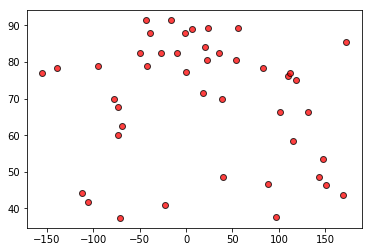

In [23]:
plt.scatter(clean_df['Lat'], clean_df['Max Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot

In [ ]:
dfc = pd.DataFrame({'A':['aaa','bbb','ccc'],'B':[1,2,3]})

dfc.loc[0,'A'] = 11

dfc